# Zomato pproject in data analysis

# Step-1 Importing the Liabraries

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import seaborn as sns

In [5]:
import matplotlib.pyplot as plt

# Step-2 Creat the Dataframe

In [6]:
dataframe = pd.read_csv("Zomato data .csv")

In [7]:
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


# Convert the data type of the columns

In [8]:
def handleRate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)
dataframe['rate']=dataframe['rate'].apply(handleRate)
print(dataframe.head())
    


                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [9]:
dataframe.size

1036

In [10]:
dataframe.shape

(148, 7)

In [11]:
dataframe.ndim

2

In [12]:
dataframe.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes',
       'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')

In [13]:
dataframe.index

RangeIndex(start=0, stop=148, step=1)

In [14]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [15]:
dataframe.describe()


,rate,votes,approx_cost(for two people)
count,148.000000,148.000000,148.000000
mean,3.633108,264.810811,418.243243
std,0.402271,653.676951,223.085098
min,2.600000,0.000000,100.000000
25%,3.300000,6.750000,200.000000
50%,3.700000,43.500000,400.000000
75%,3.900000,221.750000,600.000000
max,4.600000,4884.000000,950.000000


In [16]:
dataframe.max()

name                           XO Belgian Waffle
online_order                                 Yes
book_table                                   Yes
rate                                         4.6
votes                                       4884
approx_cost(for two people)                  950
listed_in(type)                            other
dtype: object

In [17]:
dataframe.min()

name                           360 Atoms Restaurant And Cafe
online_order                                              No
book_table                                                No
rate                                                     2.6
votes                                                      0
approx_cost(for two people)                              100
listed_in(type)                                       Buffet
dtype: object

# Type of resturant

In [18]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


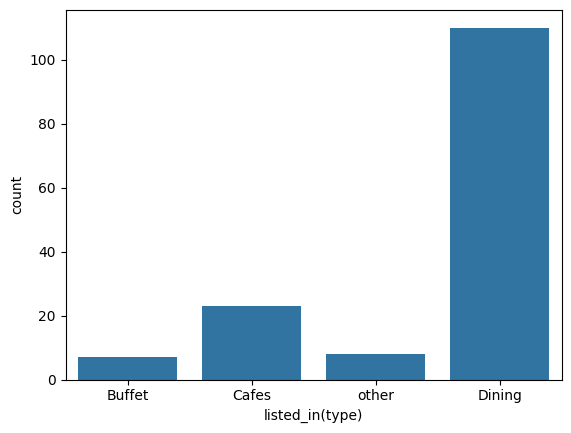

In [19]:
sns.countplot(x=dataframe["listed_in(type)"])
plt.xlabel=("type of resturant")

# Conclussion - majority of the resturant falls in dinning category

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

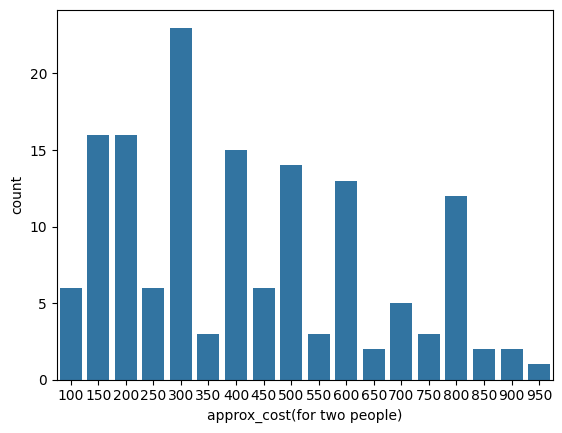

In [30]:
couple_data =dataframe["approx_cost(for two people)"]
sns.countplot(x=couple_data)

Text(0, 0.5, 'vote')

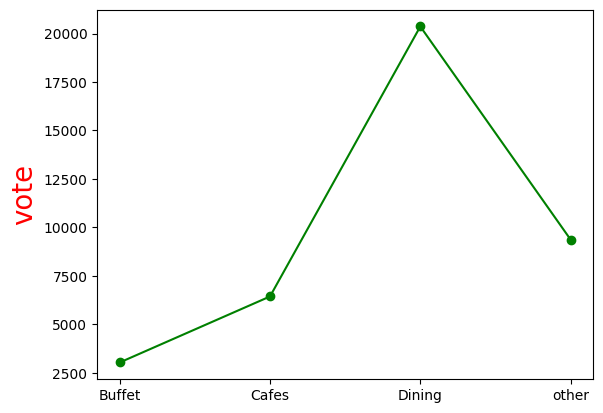

In [43]:
grouped_data = dataframe.groupby("listed_in(type)")["votes"].sum()
result= pd.DataFrame({"votes":grouped_data})
plt.plot(result, c="green",marker="o")
#plt.xlabel("Type of resturant",c="red",size=20)
plt.ylabel("vote",c="red",size=20)
                    

# Conclusion - the majority of couple prefer resturant with approximate costof 300 ruees

<Axes: xlabel='online_order', ylabel='rate'>

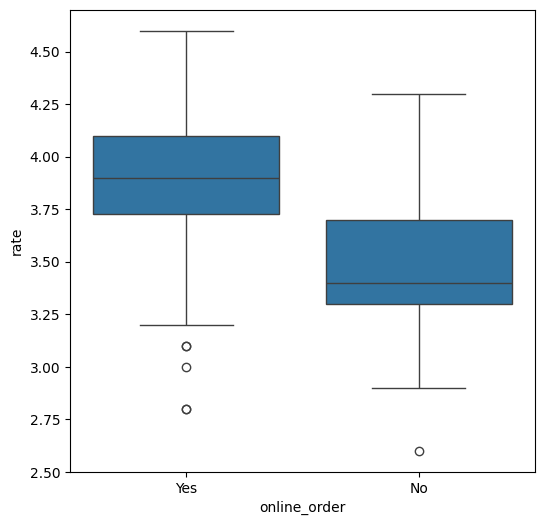

In [40]:
plt.figure(figsize=(6,6))
sns.boxplot(x="online_order",y="rate",data=dataframe)

# Conclusion- offline order received lower rating in comparision to online order

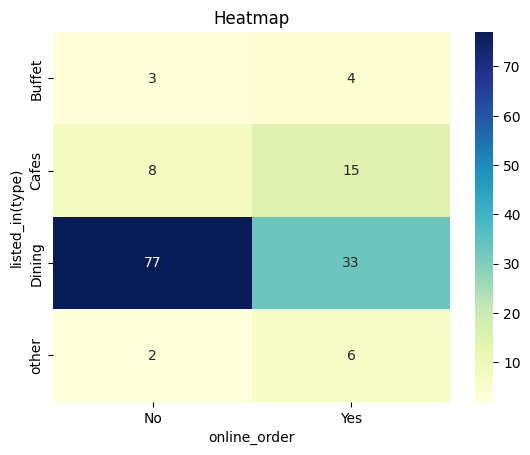

In [22]:

pivot_table = dataframe.pivot_table(index="listed_in(type)", columns="online_order", aggfunc='size', fill_value=0)

sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Heatmap")
plt.show()

# Conclussion :- Dining resturants primarily accept offline oderrs.whereas cafes primarily receive online orderas .This is suggestes that clients prefered orders in persion at resturamnts ,but prefer online ordering at cafes